# Universidade Federal do Rio Grande do Sul
# Programa de Pós-Graduação em Engenharia Civil
# Área de Concentração: Estruturas
# PEC00025 - Introdução à Teoria de Vibrações
# Aluno: Jherbyson Williams Silva Brito (00312164)

## _Trabalho 1: Resposta de um sistema de 1 GDL a uma excitação na base: Espectro de pseudo acelerações_

### 1. Objetivos

Este trabalho tem como objetivo avaliar a resposta de uma estrutura de 1 grau de liberdadde (GDL) submetida a uma excitação dinâmica, e obter o seu espectro de pseudo acelerações baseada numa análise sísmica.
Para isso, foi utilizada a NBR 15421 - Projetos de estruturas resistentes à sismos (2006) - como referência para parâmetros que serão indicados posteriormente.

### 2. Descrição da estrutura

A estrutura escolhida para a realização do ensaio foi uma passarela de pedestres localizada na cidade de Belém - PA. Tal estrutura foi escolhida devido à reclamações por parte dos usuários, pois os mesmos relatavam que sentiam a passarela vibrar em excesso, causando desconforto e insegurança dos mesmos na utilização da passarela.

Foram analisadas as excitações em vários pontos da estrutura. Entretanto, com um objetivo de análise acadêmica, foi avaliado neste trabalho somente um ponto da estrutura.

A seguir são disponibilizadas fotos da tabuleiro da passarela em questão:

[Figura 1](http://localhost:8888/view/OneDrive%20-%20Universidade%20Federal%20do%20Rio%20Grande%20do%20Sul/Mestrado%20-%20UFRGS/PPGEC%20-%20Estruturas/1%C2%BA%20Ano%20-%20Disciplinas/Introdu%C3%A7%C3%A3o%20%C3%A0%20Teoria%20de%20Vibra%C3%A7%C3%B5es/Trabalho%201/Resources/20170903_101856.jpg)

[Figura 2](http://localhost:8888/view/OneDrive%20-%20Universidade%20Federal%20do%20Rio%20Grande%20do%20Sul/Mestrado%20-%20UFRGS/PPGEC%20-%20Estruturas/1%C2%BA%20Ano%20-%20Disciplinas/Introdu%C3%A7%C3%A3o%20%C3%A0%20Teoria%20de%20Vibra%C3%A7%C3%B5es/Trabalho%201/Resources/20170903_101929.jpg)

[Figura 3](http://localhost:8888/view/OneDrive%20-%20Universidade%20Federal%20do%20Rio%20Grande%20do%20Sul/Mestrado%20-%20UFRGS/PPGEC%20-%20Estruturas/1%C2%BA%20Ano%20-%20Disciplinas/Introdu%C3%A7%C3%A3o%20%C3%A0%20Teoria%20de%20Vibra%C3%A7%C3%B5es/Trabalho%201/Resources/20170903_102734.jpg)

### 3. Metodologia

Para a obtenção das acelerações no tempo, foi utilizado o aplicativo _iNVH_, da empresa _Bosch_, com resolução de 0.009576807 m/s². A medição foi realizada no tempo de aproximadamente 3 minutos, com um intervalo médio de medição de 10 ms (milissegundos).

Para o cálculos das respostas, considerou-se que a fração de amortecimento crítico é igual à 5% ($\zeta = 0,05$) de acordo com a NBR 15421.


### 4. Memória de Cálculo

#### 4.1 Importação dos dados do arquivo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

In [29]:
m  = 1.0       # system mass in kg
Tn = np.linspace(0.1,10,100)
fn = 1/Tn      # natural frequency in Hz
zt = 0.01      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity

#### 4.2 Cálculo dos parâmetros vibratórios

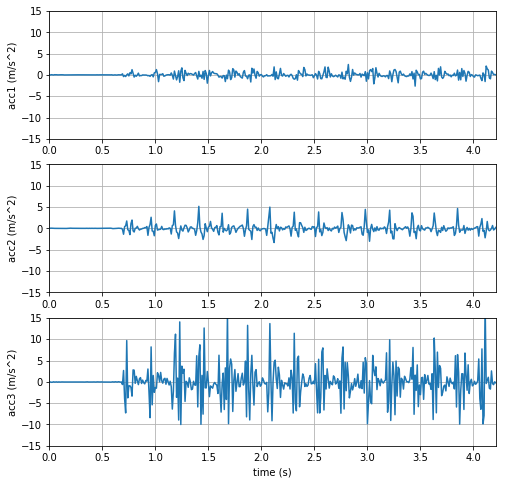

In [30]:
data = MRPy.from_file('passarela', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-15, 15);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');

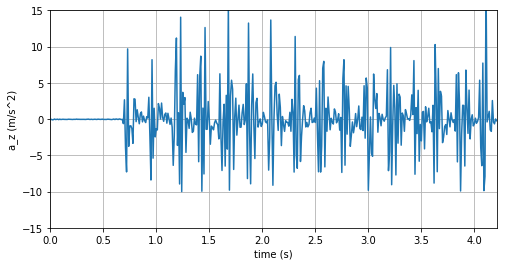

In [17]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

In [35]:
upico = np.zeros((1, len(fn)))

for i in range(0, len(fn)):
    u_DH = az.sdof_Duhamel(fn[i], zt, u0, v0)/m
    upico[0,i] = max(u_DH[0])

apico = np.zeros((1, len(fn)))
for i in range(0,len(fn)):
    apico[0,i] = ((2*(np.pi)*fn[i])**2)*upico[0,i]

Text(0, 0.5, 'Aceleração (m/s²)')

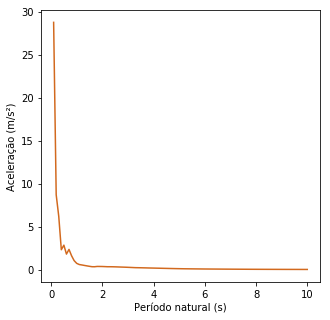

In [39]:
T_apico = np.transpose(apico)
plt.figure(1, figsize=(5, 5), clear = True)
plt.plot(Tn, T_apico, color = '#D2691E')
plt.xlabel("Período natural (s)")
plt.ylabel("Aceleração (m/s²)")

#### 4.3 Cálculo do Periodograma

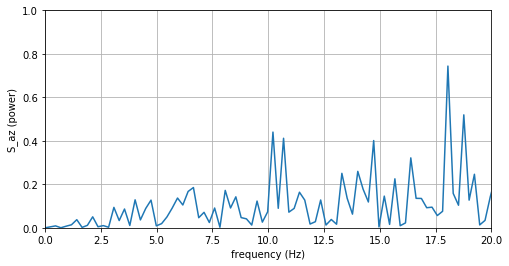

In [47]:
Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 20);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  1);   plt.ylabel('S_az (power)') 

plt.grid(True)

### 5 Referências

ASSOCIAÇÃO BRASILEIRA DE NORMAS TÉCNICAS. **Projeto de estruturas resistentes a sismos: NBR 15421**. Rio de Janeiro, 2006.